In [2]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
# Importing and inspecting CD file
df = pd.read_csv("data/aerodynamic_data_set_with_labels.csv")

df

,rle,xup,yup,yxxup,xlo,ylo,yxxlo,alpha_te,beta_te,CL,CD,CM
0,0.007840,0.433200,0.062900,-0.424500,0.361800,-0.058900,0.706900,-0.112600,0.164600,0.808246,0.007262,0.121544
1,0.008520,0.389880,0.069190,-0.466950,0.397980,-0.064790,0.777590,-0.123860,0.148140,0.800081,0.018035,0.126753
2,0.007160,0.476520,0.056610,-0.382050,0.325620,-0.053010,0.636210,-0.101340,0.181060,0.779725,0.003612,0.110895
3,0.007500,0.411540,0.066045,-0.488175,0.416070,-0.050065,0.600865,-0.106970,0.139910,0.796090,0.012809,0.118196
4,0.008860,0.498180,0.053465,-0.403275,0.343710,-0.061845,0.742245,-0.129490,0.172830,0.764920,0.007443,0.107714
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.006655,0.422708,0.059018,-0.416872,0.348515,-0.054436,0.612463,-0.095622,0.174245,0.733211,0.004544,0.099914
496,0.008015,0.509348,0.071598,-0.501772,0.420875,-0.066216,0.753843,-0.118142,0.141325,0.828059,0.009883,0.142013
497,0.008695,0.379388,0.065308,-0.374422,0.384695,-0.048546,0.824533,-0.106882,0.190705,0.911397,0.018699,0.146730
498,0.007335,0.466028,0.052728,-0.459322,0.312335,-0.060326,0.683153,-0.129402,0.157785,0.711286,0.005625,0.098725


In [4]:
# Cleaning the dataframe
df = df.drop(['CL', 'CM'], axis=1)
print(df)

          rle       xup       yup     yxxup       xlo       ylo     yxxlo  \
0    0.007840  0.433200  0.062900 -0.424500  0.361800 -0.058900  0.706900   
1    0.008520  0.389880  0.069190 -0.466950  0.397980 -0.064790  0.777590   
2    0.007160  0.476520  0.056610 -0.382050  0.325620 -0.053010  0.636210   
3    0.007500  0.411540  0.066045 -0.488175  0.416070 -0.050065  0.600865   
4    0.008860  0.498180  0.053465 -0.403275  0.343710 -0.061845  0.742245   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.006655  0.422708  0.059018 -0.416872  0.348515 -0.054436  0.612463   
496  0.008015  0.509348  0.071598 -0.501772  0.420875 -0.066216  0.753843   
497  0.008695  0.379388  0.065308 -0.374422  0.384695 -0.048546  0.824533   
498  0.007335  0.466028  0.052728 -0.459322  0.312335 -0.060326  0.683153   
499  0.007675  0.357728  0.074743 -0.395647  0.366605 -0.063271  0.577118   

     alpha_te   beta_te        CD  
0   -0.112600  0.164600  0.007262  
1  

In [5]:
# Calculating Pearson's correlation coefficient
print(df.corr())

               rle       xup       yup     yxxup       xlo       ylo  \
rle       1.000000 -0.007910 -0.002307 -0.004502  0.004943 -0.008858   
xup      -0.007910  1.000000 -0.008212 -0.015267 -0.004946 -0.011846   
yup      -0.002307 -0.008212  1.000000 -0.004977  0.003737 -0.010101   
yxxup    -0.004502 -0.015267 -0.004977  1.000000 -0.008025  0.003076   
xlo       0.004943 -0.004946  0.003737 -0.008025  1.000000 -0.000796   
ylo      -0.008858 -0.011846 -0.010101  0.003076 -0.000796  1.000000   
yxxlo    -0.021593 -0.002641 -0.004861 -0.013140  0.000207 -0.001641   
alpha_te -0.005569 -0.007622 -0.012696 -0.001227 -0.005004 -0.001783   
beta_te  -0.002699  0.010737 -0.006941 -0.003346  0.004455  0.003527   
CD       -0.020280 -0.344440  0.778454  0.003507 -0.079607  0.235397   

             yxxlo  alpha_te   beta_te        CD  
rle      -0.021593 -0.005569 -0.002699 -0.020280  
xup      -0.002641 -0.007622  0.010737 -0.344440  
yup      -0.004861 -0.012696 -0.006941  0.778454  
yxx

In [6]:
#Separating variables and response
x = df.drop('CD', axis=1)
y = df['CD']
print(x)
print(y)

          rle       xup       yup     yxxup       xlo       ylo     yxxlo  \
0    0.007840  0.433200  0.062900 -0.424500  0.361800 -0.058900  0.706900   
1    0.008520  0.389880  0.069190 -0.466950  0.397980 -0.064790  0.777590   
2    0.007160  0.476520  0.056610 -0.382050  0.325620 -0.053010  0.636210   
3    0.007500  0.411540  0.066045 -0.488175  0.416070 -0.050065  0.600865   
4    0.008860  0.498180  0.053465 -0.403275  0.343710 -0.061845  0.742245   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.006655  0.422708  0.059018 -0.416872  0.348515 -0.054436  0.612463   
496  0.008015  0.509348  0.071598 -0.501772  0.420875 -0.066216  0.753843   
497  0.008695  0.379388  0.065308 -0.374422  0.384695 -0.048546  0.824533   
498  0.007335  0.466028  0.052728 -0.459322  0.312335 -0.060326  0.683153   
499  0.007675  0.357728  0.074743 -0.395647  0.366605 -0.063271  0.577118   

     alpha_te   beta_te  
0   -0.112600  0.164600  
1   -0.123860  0.148140

In [7]:
# Normalizing inputs
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

In [8]:
# Creating train set and test set
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=101)

In [9]:
# creating a linear regression model
model = LinearRegression()

In [10]:
# fitting the model
model.fit(x_train,y_train)

LinearRegression()

In [11]:
# making predictions
predictions = model.predict(x_test)

In [12]:
# Model Evaluation
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))
print("MAE: ", mean_absolute_error(y_test, predictions))

RMSE:  0.0032012181369698036
MAE:  0.002597154912946944


In [13]:
# Residual Standard Error
n = len(y) # Number of datapoints
p = x.shape[1] # Number of variables
predictions_rse = model.predict(x_train)
rss = n*(mean_squared_error(y_train, predictions_rse))
rse = np.sqrt((1/(n-p-1))*rss)
print("RSE = ", rse)

RSE =  0.003290012936324991


In [14]:
#R-Squared value
r_squared = model.score(x_train,y_train)
print("R-squared value: ", r_squared)

R-squared value:  0.8019588211883749


In [15]:
# Coefficient Values
pd.DataFrame(zip(x.columns, model.coef_))

,0,1
0,rle,-0.000127
1,xup,-0.002375
2,yup,0.005642
3,yxxup,0.000088
4,xlo,-0.000570
5,ylo,0.001678
6,yxxlo,0.000626
7,alpha_te,-0.000868
8,beta_te,0.000091


In [16]:
# Intercept
print(model.intercept_)

0.010995885308705967


<BarContainer object of 9 artists>

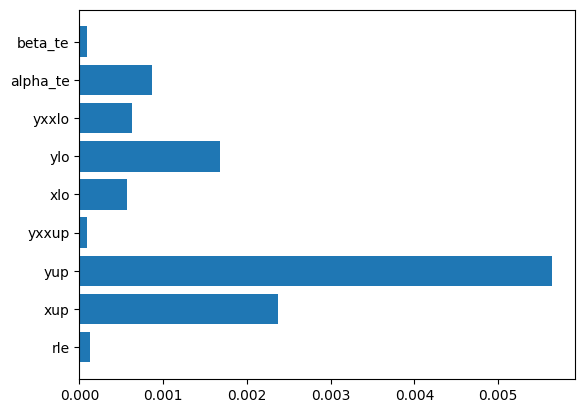

In [17]:
# Visualizing importance level through absolute value of beta
koefisien = pd.DataFrame({"Nama Kolom": x.columns, "Beta": model.coef_})
plt.barh(koefisien["Nama Kolom"], abs(koefisien["Beta"]))

In [19]:
# Hyperparameter with GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Create the model
knn = KNeighborsRegressor()

# Create the parameter grid
param_grid = {
    'n_neighbors': [k for k in range(1, 21)]
}

# Create the grid search
grid = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')

# Scale the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Fit the grid search
grid.fit(x_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:")
print(f"{grid.best_params_}")

Best Parameters:
{'n_neighbors': 6}


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b6c15a45-8d06-4acb-ae55-e8dab1b7dec4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>